In [642]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.image as pltimg
import numpy as np


%matplotlib inline

Car=pd.read_csv('car_data.csv')
Car


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [643]:
Car.shape

(1000, 5)

In [644]:
Car.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


In [645]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [646]:
#Car['User ID']=Car['User ID'].apply(str)

In [647]:
#I changed the Dtype from str to int (0= Female 1=Male)

Car=Car.replace(dict.fromkeys(['Female'],0)).replace(dict.fromkeys(['Male'],1))
Car

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
...,...,...,...,...,...
995,863,1,38,59000,0
996,800,0,47,23500,0
997,407,0,28,138500,1
998,299,0,48,134000,1


In [648]:
#However the 0 and 1 is still considered an object so we need to convert it to a int
Car['Gender']=pd.to_numeric(Car['Gender'])

Car

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
...,...,...,...,...,...
995,863,1,38,59000,0
996,800,0,47,23500,0
997,407,0,28,138500,1
998,299,0,48,134000,1


In [649]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   User ID       1000 non-null   int64
 1   Gender        1000 non-null   int64
 2   Age           1000 non-null   int64
 3   AnnualSalary  1000 non-null   int64
 4   Purchased     1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [650]:
# age_ranges=[()]

In [651]:
Car.describe()

,User ID,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.484000,40.106000,72689.000000,0.402000
std,288.819436,0.499994,10.707073,34488.341867,0.490547
min,1.000000,0.000000,18.000000,15000.000000,0.000000
25%,250.750000,0.000000,32.000000,46375.000000,0.000000
50%,500.500000,0.000000,40.000000,72000.000000,0.000000
75%,750.250000,1.000000,48.000000,90000.000000,1.000000
max,1000.000000,1.000000,63.000000,152500.000000,1.000000


In [652]:
# removing dups -> clean up 
print(Car.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [653]:
Dup=Car.drop_duplicates(subset=['User ID'])

In [654]:
Dup

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0
...,...,...,...,...,...
995,863,1,38,59000,0
996,800,0,47,23500,0
997,407,0,28,138500,1
998,299,0,48,134000,1


In [655]:
# Ages=Car.filter(items=['Age'])
# Ages


In [656]:
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']


In [657]:
Car.describe()


,User ID,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.484000,40.106000,72689.000000,0.402000
std,288.819436,0.499994,10.707073,34488.341867,0.490547
min,1.000000,0.000000,18.000000,15000.000000,0.000000
25%,250.750000,0.000000,32.000000,46375.000000,0.000000
50%,500.500000,0.000000,40.000000,72000.000000,0.000000
75%,750.250000,1.000000,48.000000,90000.000000,1.000000
max,1000.000000,1.000000,63.000000,152500.000000,1.000000


In [658]:
Car['agerange'] = pd.cut(Car.Age, bins, labels = labels,include_lowest = True)
Car


,User ID,Gender,Age,AnnualSalary,Purchased,agerange
0,385,1,35,20000,0,30-39
1,681,1,40,43500,0,30-39
2,353,1,49,74000,0,40-49
3,895,1,40,107500,1,30-39
4,661,1,25,79000,0,18-29
...,...,...,...,...,...,...
995,863,1,38,59000,0,30-39
996,800,0,47,23500,0,40-49
997,407,0,28,138500,1,18-29
998,299,0,48,134000,1,40-49


In [659]:
# Create a range for salary 
binSal = [10000, 50000, 100000, 150000, 200000]
labelSal = ['10k-49k', '50k-99k', '100k-149k', '150-199k']


In [660]:
Car['SalaryRange'] = pd.cut(Car.AnnualSalary, binSal, labels = labelSal,include_lowest = True)
Car

,User ID,Gender,Age,AnnualSalary,Purchased,agerange,SalaryRange
0,385,1,35,20000,0,30-39,10k-49k
1,681,1,40,43500,0,30-39,10k-49k
2,353,1,49,74000,0,40-49,50k-99k
3,895,1,40,107500,1,30-39,100k-149k
4,661,1,25,79000,0,18-29,50k-99k
...,...,...,...,...,...,...,...
995,863,1,38,59000,0,30-39,50k-99k
996,800,0,47,23500,0,40-49,10k-49k
997,407,0,28,138500,1,18-29,100k-149k
998,299,0,48,134000,1,40-49,100k-149k


In [661]:
# A new dataframe for purchased cars only
Purchased=Car.loc[Car['Purchased']==1]
Purchased

,User ID,Gender,Age,AnnualSalary,Purchased,agerange,SalaryRange
3,895,1,40,107500,1,30-39,100k-149k
5,846,0,47,33500,1,40-49,10k-49k
6,219,0,46,132500,1,40-49,100k-149k
11,408,1,47,23000,1,40-49,10k-49k
14,118,0,42,108000,1,40-49,100k-149k
...,...,...,...,...,...,...,...
986,572,1,48,33000,1,40-49,10k-49k
988,302,1,33,121500,1,30-39,100k-149k
994,951,0,53,104000,1,50-59,100k-149k
997,407,0,28,138500,1,18-29,100k-149k


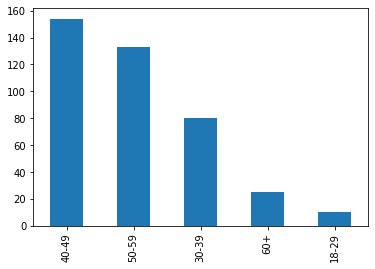

In [662]:
# We want to show the amount of people per age range who puchased a car
Purchased['agerange'].value_counts().plot(kind='bar')
plt.show()

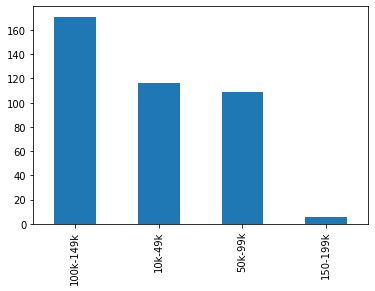

In [663]:
# We want to show the amount of people per salary range who puchased a car
Purchased['SalaryRange'].value_counts().plot(kind='bar')
plt.show()

In [664]:
Gender_count=Car.Gender.value_counts()
Gender_count
#number of men and women who are in this dataframe 

0    516
1    484
Name: Gender, dtype: int64

In [665]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   User ID       1000 non-null   int64   
 1   Gender        1000 non-null   int64   
 2   Age           1000 non-null   int64   
 3   AnnualSalary  1000 non-null   int64   
 4   Purchased     1000 non-null   int64   
 5   agerange      1000 non-null   category
 6   SalaryRange   1000 non-null   category
dtypes: category(2), int64(5)
memory usage: 41.5 KB


In [666]:
#Now I soley want those who are purchasing and not purchasing seperated
Drop_car = Car.drop(columns=['AnnualSalary','User ID', 'agerange', 'SalaryRange'])
Drop_car=Drop_car.rename(columns={'Age':'Total'})
gender_count2=Drop_car.groupby(['Gender', 'Purchased'])

gender_count2.count()

Total
Gender Purchased       
0      0            297
       1            219
1      0            301
       1            183

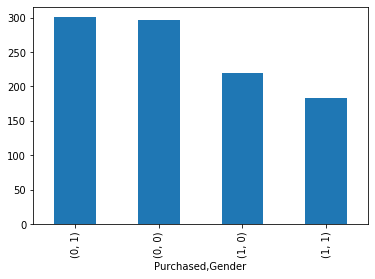

In [667]:
#lets visualize our finding
gender_count2=Drop_car.groupby(['Purchased'])
gender_count2['Gender'].value_counts().plot(kind='bar')
plt.show()

In [668]:
# Drop_car.mean().plot(kind='pie', y='Purchased')
Car.agerange = pd.Categorical(Car.agerange)

In [669]:
# gender_count2(['Gender', 'Purchased']).mean().plot(kind='pie', y='Total')
Car['agerange_'] = Car.agerange.cat.codes

In [670]:
Car.SalaryRange = pd.Categorical(Car.SalaryRange)


In [671]:
Car['SalaryRange_'] = Car.SalaryRange.cat.codes

In [672]:
# check the correlation
Car.corr(method='pearson')

,User ID,Gender,Age,AnnualSalary,Purchased,agerange_,SalaryRange_
User ID,1.000000,-0.039164,0.017647,0.006541,0.015911,0.017645,0.006435
Gender,-0.039164,1.000000,-0.084760,-0.063301,-0.047211,-0.090048,-0.030122
Age,0.017647,-0.084760,1.000000,0.166042,0.616036,0.957001,0.121547
AnnualSalary,0.006541,-0.063301,0.166042,1.000000,0.364974,0.156966,0.927671
Purchased,0.015911,-0.047211,0.616036,0.364974,1.000000,0.579286,0.274293
agerange_,0.017645,-0.090048,0.957001,0.156966,0.579286,1.000000,0.120069
SalaryRange_,0.006435,-0.030122,0.121547,0.927671,0.274293,0.120069,1.000000


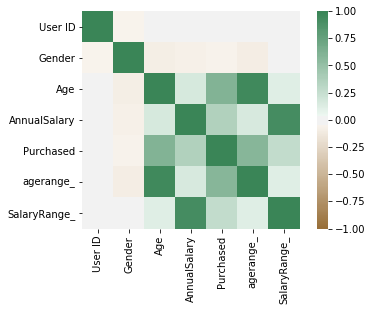

In [673]:
corr=Car.corr()
axis_corr= sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(50,500, n=500),square=True)
plt.show()

In [674]:
#convert the genders into numbers 


In [675]:
#Lets try to predict who will buy using purchased as the dependent and age and salary as out Independent variables
Car=Car.filter(items=['Gender', 'agerange_', 'SalaryRange_', 'Purchased'])
X = Car.drop(['Purchased'], axis=1)
y = Car['Purchased']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [676]:
Car

,Gender,agerange_,SalaryRange_,Purchased
0,1,1,0,0
1,1,1,0,0
2,1,2,1,0
3,1,1,2,1
4,1,0,1,0
...,...,...,...,...
995,1,1,1,0
996,0,2,0,0
997,0,0,2,1
998,0,2,2,1


In [677]:
y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [678]:
#create a decision tree
Car_model= DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)
Car_predict= Car_model.predict(X_test)
Car_predict

array([0.85106383, 0.17857143, 0.80645161, 0.        , 0.        ,
       0.        , 0.16049383, 0.90909091, 0.92592593, 0.        ,
       0.30263158, 0.        , 0.        , 0.        , 0.80645161,
       0.70967742, 0.11267606, 0.92592593, 0.87096774, 0.        ,
       0.16049383, 0.11267606, 0.        , 0.85106383, 0.85106383,
       0.30263158, 0.16049383, 0.        , 0.89285714, 0.        ,
       0.11267606, 0.30263158, 0.02272727, 0.        , 0.        ,
       0.16049383, 0.        , 0.11267606, 0.16049383, 0.85106383,
       0.16049383, 0.70967742, 0.90909091, 0.16049383, 0.90909091,
       0.17857143, 0.        , 0.16049383, 0.        , 0.        ,
       0.92592593, 0.        , 0.30263158, 0.11267606, 0.30263158,
       0.17857143, 1.        , 0.17857143, 0.11267606, 0.        ,
       0.17857143, 0.17857143, 0.92592593, 0.16049383, 0.02272727,
       0.16049383, 0.87096774, 0.11267606, 0.        , 0.80645161,
       0.30263158, 0.87096774, 0.        , 0.        , 0.16049

In [679]:

Car

,Gender,agerange_,SalaryRange_,Purchased
0,1,1,0,0
1,1,1,0,0
2,1,2,1,0
3,1,1,2,1
4,1,0,1,0
...,...,...,...,...
995,1,1,1,0
996,0,2,0,0
997,0,0,2,1
998,0,2,2,1


In [680]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        1000 non-null   int64
 1   agerange_     1000 non-null   int8 
 2   SalaryRange_  1000 non-null   int8 
 3   Purchased     1000 non-null   int64
dtypes: int64(2), int8(2)
memory usage: 17.7 KB


In [681]:

import pydotplus
import matplotlib.pyplot as plt
import graphviz
from sklearn.datasets import load_iris

clf = tree.DecisionTreeClassifier('gini', min_samples_leaf=40, random_state=0)
clf = clf.fit(X_train, y_train)

In [682]:
# plt.figure(figsize = (20,16))
# tree.plot_tree(clf, fontsize = 12, label = 'all', rounded = False , filled = True);

In [686]:
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Gender        1000 non-null   int64
 1   agerange_     1000 non-null   int8 
 2   SalaryRange_  1000 non-null   int8 
 3   Purchased     1000 non-null   int64
dtypes: int64(2), int8(2)
memory usage: 17.7 KB


In [687]:
# Car.agerange = pd.Categorical(Car.agerange_)

In [688]:
# Car['code'] = Car.agerange.cat.codes

In [689]:
# Car.SalaryRange = pd.Categorical(Car.SalaryRange)

In [690]:
# Car['SalCode'] = Car.SalaryRange.cat.codes

In [691]:
Car

,Gender,agerange_,SalaryRange_,Purchased
0,1,1,0,0
1,1,1,0,0
2,1,2,1,0
3,1,1,2,1
4,1,0,1,0
...,...,...,...,...
995,1,1,1,0
996,0,2,0,0
997,0,0,2,1
998,0,2,2,1


In [693]:
ft=['agerange_', 'SalaryRange_','Gender']
X=Car[ft]


In [694]:
dtree= DecisionTreeClassifier()
dtree= dtree.fit(X,y)
dtree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [695]:
data = tree.export_graphviz(dtree, out_file=None,
                           feature_names=features)


In [696]:
graph = pydotplus.graph_from_dot_data(data)

In [697]:
graph.write_png('Mydtreebad.png')

True

In [698]:
img=pltimg.imread('Mydtreebad.png')

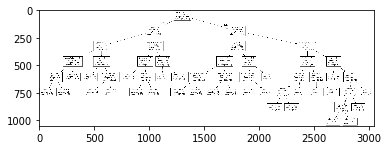

In [699]:
imgplot = plt.imshow(img)
plt.show()